In [1]:
%pip install jupysql --quiet

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
%load_ext sql

Deploy Flask apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [3]:
%%sql sqlite://
-- Create customers table
CREATE TABLE customers (
  customer_id INT PRIMARY KEY,
  customer_name VARCHAR(255),
  email VARCHAR(255)
);

-- Create orders table
CREATE TABLE orders (
  order_id INT PRIMARY KEY,
  customer_id INT,
  order_date DATE,
  total_amount DECIMAL(10, 2),
  FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);

-- Insert some sample data into customers table
INSERT INTO customers (customer_id, customer_name, email)
VALUES
  (1, 'John Doe', 'john.doe@example.com'),
  (2, 'Jane Smith', 'jane.smith@example.com'),
  (3, 'Bob Johnson', 'bob.johnson@example.com');

-- Insert some sample data into orders table
INSERT INTO orders (order_id, customer_id, order_date, total_amount)
VALUES
  (101, 1, '2022-01-15', 150.00),
  (102, 2, '2022-01-16', 200.50),
  (103, 1, '2022-01-17', 100.75),
  (104, 3, '2022-01-18', 300.00);


Connecting to 'sqlite://'

3 rows affected.

4 rows affected.

++
||
++
++

### INNER JOIN ->
Returns records that have
matching values in both
tables

In [6]:
%%sql sqlite://
SELECT * FROM customers as c 
INNER JOIN 
orders as o 
ON c.customer_id = o.customer_id ;


customer_id,customer_name,email,order_id,customer_id_1,order_date,total_amount
1,John Doe,john.doe@example.com,101,1,2022-01-15,150
2,Jane Smith,jane.smith@example.com,102,2,2022-01-16,200.5
1,John Doe,john.doe@example.com,103,1,2022-01-17,100.75
3,Bob Johnson,bob.johnson@example.com,104,3,2022-01-18,300


### LEFT JOIN ->
Returns all records from the
left table, and the matched
records from the right table

In [9]:
%%sql sqlite://
SELECT * FROM customers  as c
LEFT JOIN
orders as o 
ON c.customer_id = o.customer_id;

customer_id,customer_name,email,order_id,customer_id_1,order_date,total_amount
1,John Doe,john.doe@example.com,101,1,2022-01-15,150
1,John Doe,john.doe@example.com,103,1,2022-01-17,100.75
2,Jane Smith,jane.smith@example.com,102,2,2022-01-16,200.5
3,Bob Johnson,bob.johnson@example.com,104,3,2022-01-18,300


### RIGHT JOIN ->
Returns all records from right table , and the matched recordes from the left table

In [10]:
%%sql sqlite://
SELECT  * FROM customers as c 
RIGHT JOIN  
orders as o  
ON c.customer_id = o.customer_id

customer_id,customer_name,email,order_id,customer_id_1,order_date,total_amount
1,John Doe,john.doe@example.com,101,1,2022-01-15,150
1,John Doe,john.doe@example.com,103,1,2022-01-17,100.75
2,Jane Smith,jane.smith@example.com,102,2,2022-01-16,200.5
3,Bob Johnson,bob.johnson@example.com,104,3,2022-01-18,300


### FULL JOIN ->
Returns all records when there is a match in either left or right tabel

In [11]:
%%sql sqlite://
SELECT * FROM customers as c 
FULL JOIN 
orders as o 
ON c.customer_id = o.customer_id

customer_id,customer_name,email,order_id,customer_id_1,order_date,total_amount
1,John Doe,john.doe@example.com,101,1,2022-01-15,150
1,John Doe,john.doe@example.com,103,1,2022-01-17,100.75
2,Jane Smith,jane.smith@example.com,102,2,2022-01-16,200.5
3,Bob Johnson,bob.johnson@example.com,104,3,2022-01-18,300


### SELF JOIN ->
• A self join is a regular join in which a table is joined to
itself
• SELF Joins are powerful for comparing values in a
column of rows with the same table 

In [13]:
%%sql sqlite://
SELECT * FROM customers as c 
JOIN customers as o 
ON c.customer_id = o.customer_id 

customer_id,customer_name,email,customer_id_1,customer_name_1,email_1
1,John Doe,john.doe@example.com,1,John Doe,john.doe@example.com
2,Jane Smith,jane.smith@example.com,2,Jane Smith,jane.smith@example.com
3,Bob Johnson,bob.johnson@example.com,3,Bob Johnson,bob.johnson@example.com


### NOTE

``` Which JOIN To Use
• INNER JOIN: Returns records that have matching values in both tables
• LEFT JOIN: Returns all records from the left table, and the matched
records from the right table
• RIGHT JOIN: Returns all records from the right table, and the matched
records from the left table
• FULL JOIN: Returns all records when there is a match in either left or
right table 

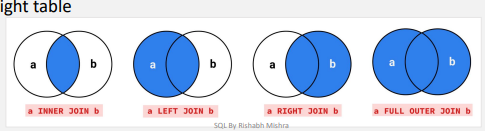

### UNION

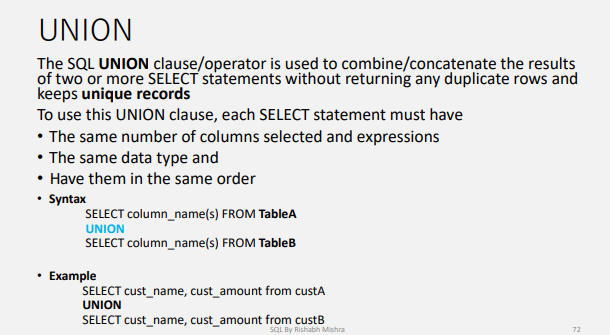

### UNION ALL

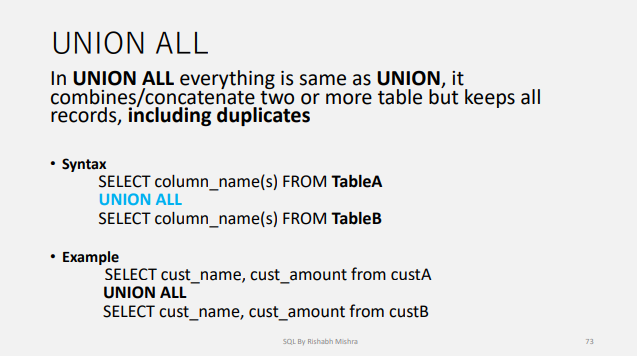